In [221]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam



In [222]:
from keras import backend as K
print(K.backend())

tensorflow


In [223]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [224]:
# Create the model
inputs = keras.Input(shape=input_shape)
x = keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [225]:
model.summary()


Model: "mnist_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_20 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_20 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [226]:
# increased batch size and epochs to make processing faster and more reliable
batch_size = 128
epochs = 100

# increase learning rate from 0.0001
optimizer = Adam(learning_rate=0.0002)
# add early stop to auto stop processing if values are not getting better
early_stop = EarlyStopping(monitor="val_loss", patience=2,restore_best_weights=True)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
# change validation split to 0.2 to get better results
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, callbacks=[early_stop])

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7349 - loss: 0.9385 - val_accuracy: 0.9353 - val_loss: 0.2466
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9192 - loss: 0.2668 - val_accuracy: 0.9534 - val_loss: 0.1638
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9416 - loss: 0.1962 - val_accuracy: 0.9630 - val_loss: 0.1295
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9510 - loss: 0.1634 - val_accuracy: 0.9701 - val_loss: 0.1092
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9575 - loss: 0.1409 - val_accuracy: 0.9735 - val_loss: 0.0963
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9611 - loss: 0.1237 - val_accuracy: 0.9758 - val_loss: 0.0866
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9651 - loss: 0.1127 - val_accuracy: 0.9779 - val_loss: 0.0795
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9676 - loss: 0.1045 - val_accu

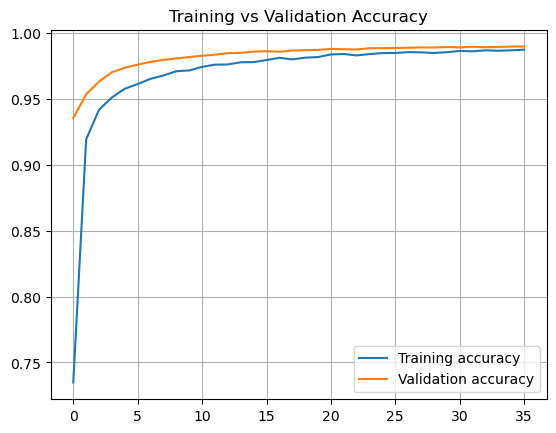

In [245]:
plt.title("Training vs Validation Accuracy")
plt.plot(history.history["accuracy"], label="Training accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.locator_params(axis='x', nbins=10)# limit number of xbins to prevent numbers being on top of each others
plt.legend()
plt.grid()
plt.show()

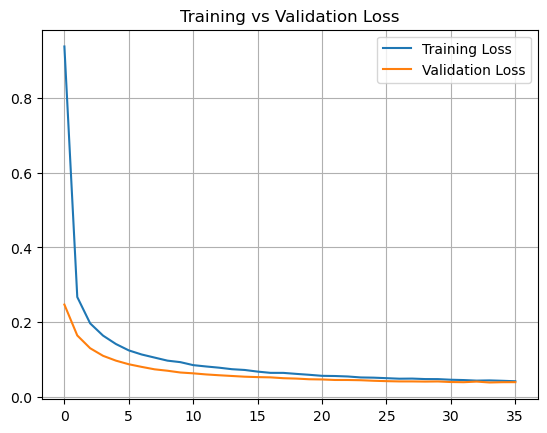

In [246]:
plt.title("Training vs Validation Loss")
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
epoch_run = range(1,len(history.history['loss']))
plt.locator_params(axis='x', nbins=10)# limit number of xbins to prevent numbers being on top of each others
plt.legend()
plt.grid()
plt.show()

In [229]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.029782284051179886
Test accuracy: 0.9898999929428101


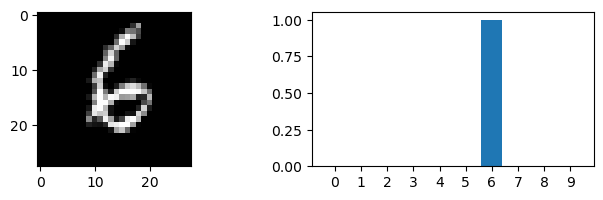

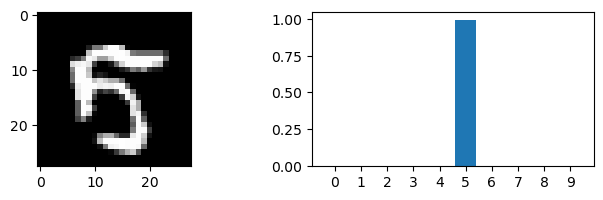

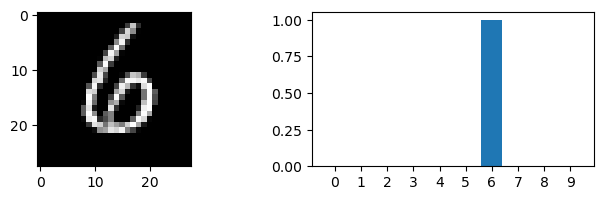

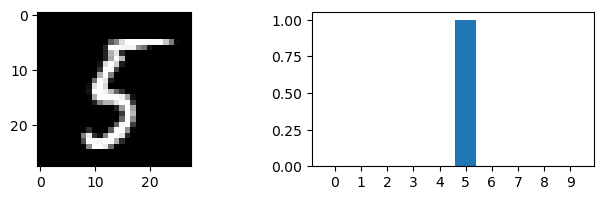

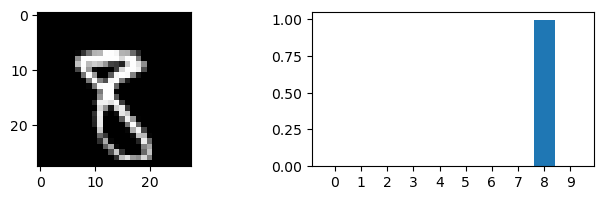

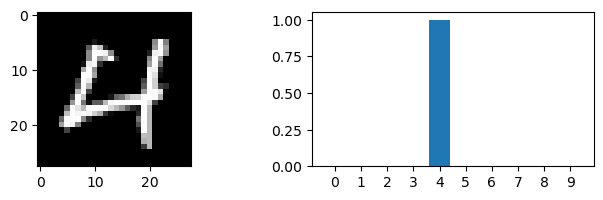

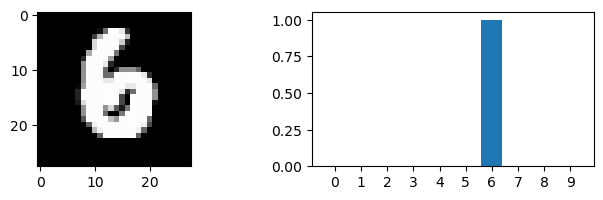

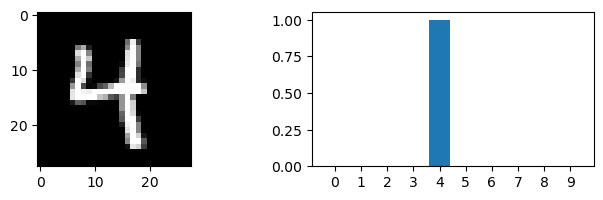

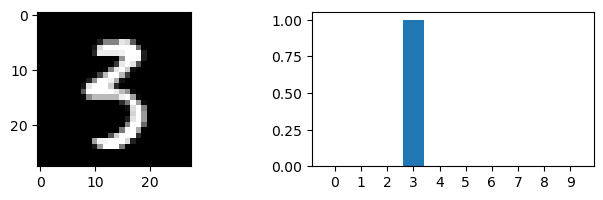

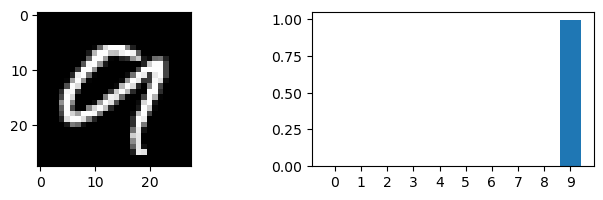

In [230]:
x = x_test
y = model(x)
start = 2000

for k in range(10):
    plt.figure(figsize=(8, 2))
    plt.subplot(1,2,1)
    plt.imshow(x[start+k].reshape((28, 28)), cmap='gray')
    ind = np.arange(0, 10)
    plt.subplot(1,2,2)
    #plt.bar(ind, y[start+k].cpu().detach().numpy().flatten())   # Pytorch
    plt.bar(ind, y[start+k].numpy().flatten())   # Tensorflow
    plt.xticks(range(10))

In [231]:
model.save('./mnist_cnn.keras')


In [232]:
model = keras.models.load_model('mnist_cnn.keras')
